## 파이썬 동적 시각화 패키지 플로틀리로 원그래프 그리기
---
> 이 글은 [플로틀리(plotly) 공식 문서 pie-charts](https://plotly.com/python/pie-charts/)를 번역 및 재해석했습니다  
</p></br></br>


파이썬(Python)의 시각화 패키지는 맷플롯립(Matploylib)과 Matplotlib 호환 패키지가 대표적으로 손꼽히지만, 이러한 패키지들은 정적 시각화 패키지라는 한계가 있습니다. 만약 동적 시각화를 사용하고 싶다면, 다른 패키지를 함께 배워야 하지요. 시각화 패키지는 크게 정적과 동적 시각화 기능을 가지고 있는데, 알기 쉽게 설명하자면 아래와 같습니다.  
</p></br></br>


* 정적 시각화: 움직이지 않는 그래프
* 동적 시각화: 사용자의 입력에 따라 축을 조절하거나, 요소를 추가/제거하는 조작이 가능한 그래프  
</p></br></br>


그리고, 이번에 살펴볼 패키지인 플로틀리(plotly)가 파이썬에서 이용하는 대표적인 동적 시각화 패키지입니다. plotly는 파이썬뿐만 아니라 다양한 언어를 지원하는 오픈소스 그래픽 라이브러리인데요, 이를 잘 활용한다면 그래프 한번 그리는데 큰 고생을 하지 않고도 원하는 스케일과 자료 선택이 가능해지는 장점이 생기게 된답니다.  
</p></br></br>


### plotly로 원그래프 그리기
---
plotly는 기본적으로 플로틀리 익스프레스(plotly express)라는 기능을 이용해 시각화를 구현합니다. 만약 plotly가 설치되지 않았다면, `$pip install plotly` 명령어를 입력해 설치해 주시기 바랍니다. 그리고, 그래프를 바로 그려 보겠습니다. 예를 들어, 원그래프(pie chart)를 그리고 싶다면 아래와 같이 입력하기만 하면 되지요.  
</p></br></br>



In [1]:
# 패키지 불러오기
import plotly.express as px

# 샘플 데이터 불러오기
df = px.data.gapminder().query("year == 2007").query("continent == 'Europe'")
df.loc[df['pop'] < 2.e6, 'country'] = 'Other countries'

df.head()

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
23,Albania,Europe,2007,76.423,3600523,5937.029526,ALB,8
83,Austria,Europe,2007,79.829,8199783,36126.492700,AUT,40
119,Belgium,Europe,2007,79.441,10392226,33692.605080,BEL,56
155,Bosnia and Herzegovina,Europe,2007,74.852,4552198,7446.298803,BIH,70
191,Bulgaria,Europe,2007,73.005,7322858,10680.792820,BGR,100


</p></br></br>


데이터의 형태는 위와 같습니다. 이번에 그릴 그래프는 각 나라(country)별 인구밀도(pop)를 시각화하는 작업을 해 보도록 하겠습니다.  
</p></br></br>


plotly에서 원그래프를 그리고 싶다면, `px.pie` 함수를 호출하는 것만으로 손쉽게 작업할 수 있습니다. 해당 함수에서는 입력할 데이터(data_frame), 표시할 값(values), 라벨(names), 그래프 이름(title) 정도만 입력하면 됩니다. 추상화가 잘 되어 있는 패키지라서 이렇게 최소한의 사용법만으로도 그럴듯한 그래프를 그릴 수 있는게 장점이지요. 그리고, 만약 파일로 내보내기(export)하고 싶다면 plotly express에서 자체적으로 HTML export를 지원하기 때문에, `write_html` 함수를 이용해 주기만 하면 됩니다.  
</p></br></br>


plotly를 사용해서 시각화를 하면, 해당 그래프는 동적 그래프(interactive plot)이 됩니다. 해당 화면에서는 오른쪽의 범례(legend)에서 국가 이름을 클릭해 그래프로 넣거나 뺄 수 있고, 이것이 실시간으로 반영되는 등 누군가에게 최대한 많은 데이터를 효과적으로 보여주고 싶을 때, 아니면 데이터 전반을 살펴보고 싶을 때 유용하게 써먹을 수 있습니다.  
</p></br></br>



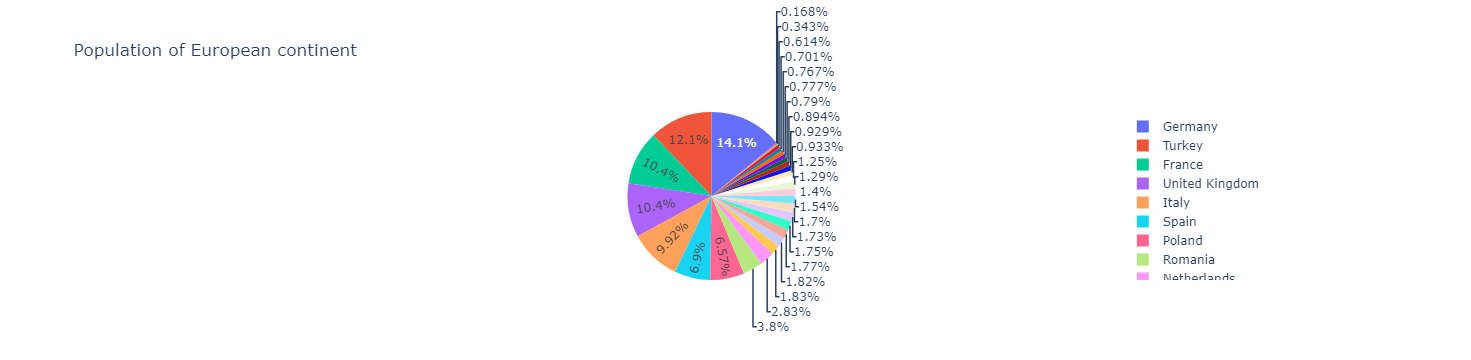

In [4]:
fig = px.pie(data_frame=df, values='pop', names='country', title='Population of European continent')
fig.write_html("./result.html")  # 파일 내보내기
fig.show()

</p></br></br>


만약 이런 그래프를 웹앱으로 구현하거나, 외부 사용자에게 배포를 하고 싶다면 plotly에서 제공하는 대시(Dash) 프레임워크를 이용해볼 수 있습니다. Dash는 데이터앱을 손쉽게 만들 수 있는 기능을 제공하는데, 이걸 이용해서 원그래프를 손쉽게 배포할 수 있습니다. 이번에는 원격 접속이 가능한 웹서버를 구현하지는 않고, 로컬호스트(localhost) 접속이 가능한 웹앱 형식으로 출력되게 그래프를 그려 보도록 하겠습니다. 만약 Dash 설치가 되지 않았다면 `$pip install dash` 명령어를 이용해 설치해 주세요. 주피터(Jupyter) 개발환경을 사용하고 있다면 `$pip install jupyter-dash` 명령어를 사용하는 것을 권장합니다.  
</p></br></br>



In [3]:
%tb 
# 자세한 에러메시지 확인을 위한 매직코드

# 패키지 불러오기
from dash import Dash, dcc, html, Input, Output
import plotly.express as px

# 웹앱 설정
app = Dash(__name__)

app.layout = html.Div([
    html.H4('Analysis of the restaurant sales'),  # 제목 설정
    dcc.Graph(id="graph"),
    html.P("Names:"),
    dcc.Dropdown(id='names',
        options=['smoker', 'day', 'time', 'sex'],
        value='day', clearable=False
    ),
    html.P("Values:"),
    dcc.Dropdown(id='values',  # 드롭다운 메뉴 설정
        options=['total_bill', 'tip', 'size'],
        value='total_bill', clearable=False
    ),
])


@app.callback(
    Output("graph", "figure"), 
    Input("names", "value"), 
    Input("values", "value"))
def generate_chart(names, values):
    df = px.data.tips() # replace with your own data source
    fig = px.pie(df, values=values, names=names, hole=.3)
    return fig


# 웹앱 구동
app.run_server(debug=False)

No traceback available to show.


Dash is running on http://127.0.0.1:8050/

 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:8050
Press CTRL+C to quit
127.0.0.1 - - [15/May/2023 10:09:13] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [15/May/2023 10:09:13] "GET /_dash-component-suites/dash/deps/polyfill@7.v2_9_3m1684112862.12.1.min.js HTTP/1.1" 200 -
127.0.0.1 - - [15/May/2023 10:09:13] "GET /_dash-component-suites/dash/deps/react@16.v2_9_3m1684112862.14.0.min.js HTTP/1.1" 200 -
127.0.0.1 - - [15/May/2023 10:09:13] "GET /_dash-component-suites/dash/deps/react-dom@16.v2_9_3m1684112862.14.0.min.js HTTP/1.1" 200 -
127.0.0.1 - - [15/May/2023 10:09:13] "GET /_dash-component-suites/dash/deps/prop-types@15.v2_9_3m1684112862.8.1.min.js HTTP/1.1" 200 -
127.0.0.1 - - [15/May/2023 10:09:13] "GET /_dash-component-suites/dash/dash-renderer/build/dash_renderer.v2_9_3m1684112862.min.js HTTP/1.1" 200 -
127.0.0.1 - - [15/May/2023 10:09:13] "GET /_dash-component-suites/dash/dcc/dash_core_components.v2_9_2m1684112862.js HTTP/1.1" 200 -
127.0.0.1 - - [15/May/2023 10:09:13] "GET /_dash-component-suites/dash

</p></br></br>


<img src="./figure/dash_1.png">
</p></br></br>


이렇게 웹앱과 같은 환경으로 그래프를 그린 결과물을 배포할 수 있습니다. 해당 작업은 웹서버를 구동하고 있다면 효과적으로 내 분석 결과물을 다른 사람에게 보여줄 수 있다는 장점이 있지요.  
</p></br></br>

